In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np 
import scipy as sp 
import sklearn
import random 
from sklearn.preprocessing import MinMaxScaler
import time 
from sklearn import preprocessing, model_selection
from imblearn.over_sampling import RandomOverSampler
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle
from keras.layers import Embedding, LSTM, SpatialDropout1D
data = pd.read_csv('propversion.csv')
#data = shuffle(data)

C:\Users\SUSHANT\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
Using TensorFlow backend.


In [2]:
#data = data.drop(['name', 'version', 'name'], axis =1)
X = data.drop(['bug'], axis = 1)
X = np.array(X)
Y = data['bug']
Y.shape

(69653,)

In [3]:
scaler = MinMaxScaler()
MinMaxScaler(copy=True, feature_range=(0, 1))
cols_to_norm = ['wmc', 'dit', 'noc', 'cbo', 'rfc', 'lcom', 'ca', 'ce', 'npm', 'lcom3', 'loc', 'dam', 'moa', 'mfa', 'cam', 'ic', 'cbm', 'amc', 'max_cc', 'avg_cc']
data[cols_to_norm] = MinMaxScaler().fit_transform(data[cols_to_norm])
print(data.head())

        wmc       dit       noc       cbo       rfc      lcom        ca  \
0  0.005764  0.444444  0.000000  0.002326  0.012723  0.000017  0.000000   
1  0.034582  0.444444  0.001832  0.022093  0.111959  0.001100  0.002326   
2  0.028818  0.444444  0.000000  0.015116  0.122137  0.000750  0.004651   
3  0.005764  0.333333  0.000000  0.005814  0.017812  0.000017  0.000000   
4  0.023055  0.111111  0.000000  0.004651  0.096692  0.000000  0.003488   

         ce       npm     lcom3  ...  dam  moa       mfa       cam        ic  \
0  0.015385  0.002882  1.000000  ...  1.0  0.0  0.941176  0.750000  0.166667   
1  0.138462  0.017291  1.000000  ...  0.0  0.0  0.905172  0.350000  0.333333   
2  0.100000  0.005764  0.533333  ...  1.0  0.0  0.918919  0.500000  0.333333   
3  0.038462  0.002882  1.000000  ...  1.0  0.0  0.933333  0.750000  0.166667   
4  0.007692  0.014409  0.321429  ...  0.5  0.0  0.000000  0.285714  0.000000   

        cbm       amc    max_cc    avg_cc  bug  
0  0.045455  0.0030

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 39005 samples, validate on 16717 samples
Epoch 1/500
39005/39005 [==============================] - 17s 435us/step - loss: 0.6225 - acc: 0.8751 - mean_squared_error: 0.7151 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.1992 - cosine_proximity: -0.1686 - val_loss: 0.4811 - val_acc: 0.8763 - val_mean_squared_error: 0.8396 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.4046 - val_cosine_proximity: -0.1462
Epoch 2/500
39005/39005 [==============================] - 11s 272us/step - loss: 0.4814 - acc: 0.8777 - mean_squared_error: 0.7159 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.1400 - cosine_proximity: -0.1456 - val_loss: 0.4758 - val_acc: 0.8763 - val_mean_squ

Epoch 18/500
39005/39005 [==============================] - 9s 238us/step - loss: 0.4683 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.1992 - cosine_proximity: -0.1494 - val_loss: 0.4620 - val_acc: 0.8763 - val_mean_squared_error: 0.8397 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.5751 - val_cosine_proximity: -0.1526
Epoch 19/500
39005/39005 [==============================] - 10s 264us/step - loss: 0.4669 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.2459 - cosine_proximity: -0.1496 - val_loss: 0.4634 - val_acc: 0.8763 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9101 - val_cosine_proximity: -0.1505
Epoch 20/500
39005/39005 [==============================] - 10s 262us/step - loss: 0.4676 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolut

39005/39005 [==============================] - 10s 255us/step - loss: 0.4631 - acc: 0.8778 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4492 - cosine_proximity: -0.1509 - val_loss: 0.4618 - val_acc: 0.8763 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9291 - val_cosine_proximity: -0.1492
Epoch 37/500
39005/39005 [==============================] - 11s 289us/step - loss: 0.4628 - acc: 0.8778 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4012 - cosine_proximity: -0.1506 - val_loss: 0.4606 - val_acc: 0.8764 - val_mean_squared_error: 0.8396 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9250 - val_cosine_proximity: -0.1533
Epoch 38/500
39005/39005 [==============================] - 13s 323us/step - loss: 0.4610 - acc: 0.8778 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2

39005/39005 [==============================] - 14s 369us/step - loss: 0.4615 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3656 - cosine_proximity: -0.1516 - val_loss: 0.4604 - val_acc: 0.8762 - val_mean_squared_error: 0.8403 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.7665 - val_cosine_proximity: -0.1499
Epoch 55/500
39005/39005 [==============================] - 13s 324us/step - loss: 0.4610 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3084 - cosine_proximity: -0.1510 - val_loss: 0.4607 - val_acc: 0.8763 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8533 - val_cosine_proximity: -0.1517
Epoch 56/500
39005/39005 [==============================] - 13s 330us/step - loss: 0.4605 - acc: 0.8778 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2

39005/39005 [==============================] - 13s 342us/step - loss: 0.4585 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3887 - cosine_proximity: -0.1515 - val_loss: 0.4613 - val_acc: 0.8763 - val_mean_squared_error: 0.8404 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9630 - val_cosine_proximity: -0.1500
Epoch 73/500
39005/39005 [==============================] - 13s 324us/step - loss: 0.4582 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3800 - cosine_proximity: -0.1520 - val_loss: 0.4584 - val_acc: 0.8762 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8662 - val_cosine_proximity: -0.1526
Epoch 74/500
39005/39005 [==============================] - 13s 330us/step - loss: 0.4581 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2

39005/39005 [==============================] - 13s 332us/step - loss: 0.4581 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3500 - cosine_proximity: -0.1518 - val_loss: 0.4593 - val_acc: 0.8762 - val_mean_squared_error: 0.8394 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8015 - val_cosine_proximity: -0.1557
Epoch 92/500
39005/39005 [==============================] - 15s 395us/step - loss: 0.4581 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4092 - cosine_proximity: -0.1521 - val_loss: 0.4601 - val_acc: 0.8762 - val_mean_squared_error: 0.8403 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8951 - val_cosine_proximity: -0.1513rox
Epoch 93/500
39005/39005 [==============================] - 13s 341us/step - loss: 0.4571 - acc: 0.8776 - mean_squared_error: 0.7161 - mean_absolute_error: 

39005/39005 [==============================] - 11s 269us/step - loss: 0.4588 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.2992 - cosine_proximity: -0.1515 - val_loss: 0.4603 - val_acc: 0.8762 - val_mean_squared_error: 0.8396 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0925 - val_cosine_proximity: -0.1531
Epoch 111/500
39005/39005 [==============================] - 11s 271us/step - loss: 0.4573 - acc: 0.8778 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3782 - cosine_proximity: -0.1526 - val_loss: 0.4609 - val_acc: 0.8762 - val_mean_squared_error: 0.8403 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0348 - val_cosine_proximity: -0.1507
Epoch 112/500
39005/39005 [==============================] - 10s 252us/step - loss: 0.4582 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0

39005/39005 [==============================] - 11s 271us/step - loss: 0.4565 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3889 - cosine_proximity: -0.1520 - val_loss: 0.4626 - val_acc: 0.8762 - val_mean_squared_error: 0.8403 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.7845 - val_cosine_proximity: -0.1489
Epoch 130/500
39005/39005 [==============================] - 11s 274us/step - loss: 0.4565 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3887 - cosine_proximity: -0.1522 - val_loss: 0.4608 - val_acc: 0.8762 - val_mean_squared_error: 0.8404 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.7725 - val_cosine_proximity: -0.1524
Epoch 131/500
39005/39005 [==============================] - 10s 253us/step - loss: 0.4566 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0

39005/39005 [==============================] - 10s 266us/step - loss: 0.4576 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3946 - cosine_proximity: -0.1510 - val_loss: 0.4581 - val_acc: 0.8761 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8951 - val_cosine_proximity: -0.1522
Epoch 149/500
39005/39005 [==============================] - 10s 268us/step - loss: 0.4573 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3541 - cosine_proximity: -0.1517 - val_loss: 0.4585 - val_acc: 0.8762 - val_mean_squared_error: 0.8397 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0836 - val_cosine_proximity: -0.1531
Epoch 150/500
39005/39005 [==============================] - 10s 253us/step - loss: 0.4568 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0

39005/39005 [==============================] - 10s 255us/step - loss: 0.4559 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4651 - cosine_proximity: -0.1528 - val_loss: 0.4569 - val_acc: 0.8762 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8652 - val_cosine_proximity: -0.1546
Epoch 168/500
39005/39005 [==============================] - 11s 275us/step - loss: 0.4561 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3697 - cosine_proximity: -0.1528 - val_loss: 0.4602 - val_acc: 0.8761 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0357 - val_cosine_proximity: -0.1506
Epoch 169/500
39005/39005 [==============================] - 11s 277us/step - loss: 0.4555 - acc: 0.8778 - mean_squared_error: 0.7160 - mean_absolute_error: 0

39005/39005 [==============================] - 10s 253us/step - loss: 0.4544 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3279 - cosine_proximity: -0.1529 - val_loss: 0.4588 - val_acc: 0.8761 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9430 - val_cosine_proximity: -0.1569
Epoch 187/500
39005/39005 [==============================] - 11s 272us/step - loss: 0.4559 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3233 - cosine_proximity: -0.1523 - val_loss: 0.4636 - val_acc: 0.8762 - val_mean_squared_error: 0.8402 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9729 - val_cosine_proximity: -0.1504
Epoch 188/500
39005/39005 [==============================] - 11s 270us/step - loss: 0.4557 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0

39005/39005 [==============================] - 10s 257us/step - loss: 0.4545 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3682 - cosine_proximity: -0.1525 - val_loss: 0.4593 - val_acc: 0.8762 - val_mean_squared_error: 0.8401 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9490 - val_cosine_proximity: -0.1516
Epoch 206/500
39005/39005 [==============================] - 9s 239us/step - loss: 0.4556 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4428 - cosine_proximity: -0.1522 - val_loss: 0.4594 - val_acc: 0.8762 - val_mean_squared_error: 0.8395 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9819 - val_cosine_proximity: -0.1547
Epoch 207/500
39005/39005 [==============================] - 10s 262us/step - loss: 0.4579 - acc: 0.8777 - mean_squared_error: 0.7160 - mean_absolute_error: 0.

39005/39005 [==============================] - 9s 243us/step - loss: 0.4557 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4679 - cosine_proximity: -0.1521 - val_loss: 0.4603 - val_acc: 0.8762 - val_mean_squared_error: 0.8394 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.6439 - val_cosine_proximity: -0.1557
Epoch 225/500
39005/39005 [==============================] - 10s 265us/step - loss: 0.4545 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3789 - cosine_proximity: -0.1524 - val_loss: 0.4633 - val_acc: 0.8762 - val_mean_squared_error: 0.8403 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9340 - val_cosine_proximity: -0.1503
Epoch 226/500
39005/39005 [==============================] - 10s 249us/step - loss: 0.4560 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.

39005/39005 [==============================] - 13s 321us/step - loss: 0.4560 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3612 - cosine_proximity: -0.1519 - val_loss: 0.4600 - val_acc: 0.8762 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8772 - val_cosine_proximity: -0.1518
Epoch 244/500
39005/39005 [==============================] - 13s 321us/step - loss: 0.4573 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4748 - cosine_proximity: -0.1514 - val_loss: 0.4622 - val_acc: 0.8762 - val_mean_squared_error: 0.8401 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.1933 - val_cosine_proximity: -0.1495error: 0.2230 - ETA: 3s - loss: 0.4528 - acc: 0.8790 - mean_squared_error: 0.6993 - mean_absolute_error: 0.22 - ETA: 1s - loss: 0.4578 - acc: 0.8776 - mean_squ

39005/39005 [==============================] - 12s 314us/step - loss: 0.4547 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3130 - cosine_proximity: -0.1530 - val_loss: 0.4571 - val_acc: 0.8762 - val_mean_squared_error: 0.8401 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9819 - val_cosine_proximity: -0.1536
Epoch 261/500
39005/39005 [==============================] - 12s 304us/step - loss: 0.4539 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3953 - cosine_proximity: -0.1525 - val_loss: 0.4605 - val_acc: 0.8762 - val_mean_squared_error: 0.8401 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8961 - val_cosine_proximity: -0.1523
Epoch 262/500
39005/39005 [==============================] - 12s 311us/step - loss: 0.4538 - acc: 0.8779 - mean_squared_error: 0.7161 - mean_absolute_error: 0

39005/39005 [==============================] - 12s 303us/step - loss: 0.4532 - acc: 0.8779 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4074 - cosine_proximity: -0.1530 - val_loss: 0.4610 - val_acc: 0.8761 - val_mean_squared_error: 0.8401 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8263 - val_cosine_proximity: -0.1514
Epoch 280/500
39005/39005 [==============================] - 12s 312us/step - loss: 0.4540 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3512 - cosine_proximity: -0.1522 - val_loss: 0.4609 - val_acc: 0.8761 - val_mean_squared_error: 0.8399 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0327 - val_cosine_proximity: -0.1545
Epoch 281/500
39005/39005 [==============================] - 12s 299us/step - loss: 0.4542 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0

39005/39005 [==============================] - 12s 307us/step - loss: 0.4534 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.3279 - cosine_proximity: -0.1528 - val_loss: 0.4616 - val_acc: 0.8761 - val_mean_squared_error: 0.8403 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0806 - val_cosine_proximity: -0.1517
Epoch 299/500
39005/39005 [==============================] - 12s 303us/step - loss: 0.4527 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4005 - cosine_proximity: -0.1532 - val_loss: 0.4592 - val_acc: 0.8762 - val_mean_squared_error: 0.8401 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0058 - val_cosine_proximity: -0.1534
Epoch 300/500
39005/39005 [==============================] - 11s 279us/step - loss: 0.4524 - acc: 0.8776 - mean_squared_error: 0.7161 - mean_absolute_error: 0

39005/39005 [==============================] - 12s 297us/step - loss: 0.4519 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4405 - cosine_proximity: -0.1533 - val_loss: 0.4581 - val_acc: 0.8761 - val_mean_squared_error: 0.8397 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.7546 - val_cosine_proximity: -0.1583
Epoch 318/500
39005/39005 [==============================] - 11s 281us/step - loss: 0.4526 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4776 - cosine_proximity: -0.1532 - val_loss: 0.4574 - val_acc: 0.8761 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8832 - val_cosine_proximity: -0.1562
Epoch 319/500
39005/39005 [==============================] - 12s 304us/step - loss: 0.4528 - acc: 0.8779 - mean_squared_error: 0.7161 - mean_absolute_error: 0

Epoch 336/500
39005/39005 [==============================] - 12s 300us/step - loss: 0.4516 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4269 - cosine_proximity: -0.1532 - val_loss: 0.4609 - val_acc: 0.8760 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.1045 - val_cosine_proximity: -0.1532
Epoch 337/500
39005/39005 [==============================] - 12s 303us/step - loss: 0.4521 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.5112 - cosine_proximity: -0.1530 - val_loss: 0.4627 - val_acc: 0.8761 - val_mean_squared_error: 0.8402 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.1195 - val_cosine_proximity: -0.1503
Epoch 338/500
39005/39005 [==============================] - 11s 289us/step - loss: 0.4519 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_abs

39005/39005 [==============================] - 11s 284us/step - loss: 0.4522 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4073 - cosine_proximity: -0.1531 - val_loss: 0.4597 - val_acc: 0.8762 - val_mean_squared_error: 0.8401 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8892 - val_cosine_proximity: -0.1533
Epoch 356/500
39005/39005 [==============================] - 10s 265us/step - loss: 0.4519 - acc: 0.8779 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.5169 - cosine_proximity: -0.1532 - val_loss: 0.4616 - val_acc: 0.8761 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9579 - val_cosine_proximity: -0.1527
Epoch 357/500
39005/39005 [==============================] - 13s 321us/step - loss: 0.4530 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0

39005/39005 [==============================] - 9s 228us/step - loss: 0.4516 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4833 - cosine_proximity: -0.1530 - val_loss: 0.4594 - val_acc: 0.8762 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9520 - val_cosine_proximity: -0.1560
Epoch 375/500
39005/39005 [==============================] - 10s 246us/step - loss: 0.4512 - acc: 0.8779 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4492 - cosine_proximity: -0.1535 - val_loss: 0.4588 - val_acc: 0.8761 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0357 - val_cosine_proximity: -0.1548
Epoch 376/500
39005/39005 [==============================] - 10s 253us/step - loss: 0.4529 - acc: 0.8779 - mean_squared_error: 0.7161 - mean_absolute_error: 0.

39005/39005 [==============================] - 9s 241us/step - loss: 0.4524 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4381 - cosine_proximity: -0.1529 - val_loss: 0.4616 - val_acc: 0.8761 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0785 - val_cosine_proximity: -0.1534
Epoch 394/500
39005/39005 [==============================] - 10s 250us/step - loss: 0.4515 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.5245 - cosine_proximity: -0.1527 - val_loss: 0.4598 - val_acc: 0.8761 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8981 - val_cosine_proximity: -0.1532
Epoch 395/500
39005/39005 [==============================] - 10s 251us/step - loss: 0.4529 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.

39005/39005 [==============================] - 9s 239us/step - loss: 0.4530 - acc: 0.8779 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4371 - cosine_proximity: -0.1531 - val_loss: 0.4614 - val_acc: 0.8762 - val_mean_squared_error: 0.8401 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.8841 - val_cosine_proximity: -0.1525
Epoch 413/500
39005/39005 [==============================] - 10s 245us/step - loss: 0.4539 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4411 - cosine_proximity: -0.1528 - val_loss: 0.4602 - val_acc: 0.8762 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0477 - val_cosine_proximity: -0.1556
Epoch 414/500
39005/39005 [==============================] - 10s 249us/step - loss: 0.4526 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.

39005/39005 [==============================] - 9s 240us/step - loss: 0.4516 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4497 - cosine_proximity: -0.1528 - val_loss: 0.4616 - val_acc: 0.8762 - val_mean_squared_error: 0.8399 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0058 - val_cosine_proximity: -0.1524
Epoch 432/500
39005/39005 [==============================] - 10s 247us/step - loss: 0.4524 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.5497 - cosine_proximity: -0.1530 - val_loss: 0.4607 - val_acc: 0.8762 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9310 - val_cosine_proximity: -0.1543
Epoch 433/500
39005/39005 [==============================] - 9s 227us/step - loss: 0.4535 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2

39005/39005 [==============================] - 9s 242us/step - loss: 0.4524 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4528 - cosine_proximity: -0.1529 - val_loss: 0.4601 - val_acc: 0.8762 - val_mean_squared_error: 0.8398 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0746 - val_cosine_proximity: -0.1539
Epoch 451/500
39005/39005 [==============================] - 10s 257us/step - loss: 0.4532 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4612 - cosine_proximity: -0.1523 - val_loss: 0.4602 - val_acc: 0.8762 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9460 - val_cosine_proximity: -0.1533
Epoch 452/500
39005/39005 [==============================] - 10s 259us/step - loss: 0.4516 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.

39005/39005 [==============================] - 10s 256us/step - loss: 0.4527 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.5592 - cosine_proximity: -0.1525 - val_loss: 0.4627 - val_acc: 0.8762 - val_mean_squared_error: 0.8401 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0019 - val_cosine_proximity: -0.1503
Epoch 470/500
39005/39005 [==============================] - 10s 258us/step - loss: 0.4523 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.5361 - cosine_proximity: -0.1523 - val_loss: 0.4619 - val_acc: 0.8762 - val_mean_squared_error: 0.8400 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049873.0596 - val_cosine_proximity: -0.1534
Epoch 471/500
39005/39005 [==============================] - 10s 244us/step - loss: 0.4532 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0

39005/39005 [==============================] - 9s 239us/step - loss: 0.4514 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4951 - cosine_proximity: -0.1536 - val_loss: 0.4619 - val_acc: 0.8762 - val_mean_squared_error: 0.8394 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9589 - val_cosine_proximity: -0.1580
Epoch 489/500
39005/39005 [==============================] - 10s 255us/step - loss: 0.4521 - acc: 0.8777 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 19080620.4008 - cosine_proximity: -0.1531 - val_loss: 0.4611 - val_acc: 0.8759 - val_mean_squared_error: 0.8396 - val_mean_absolute_error: 0.2287 - val_mean_absolute_percentage_error: 19049872.9250 - val_cosine_proximity: -0.1547
Epoch 490/500
39005/39005 [==============================] - 9s 242us/step - loss: 0.4500 - acc: 0.8778 - mean_squared_error: 0.7161 - mean_absolute_error: 0.2

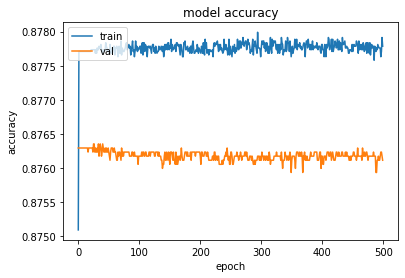

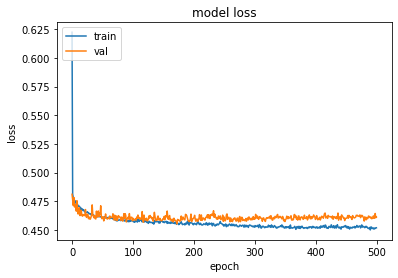

In [4]:
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
train_x, test_x, train_y, test_y = model_selection.train_test_split(X,Y,test_size = 0.2, random_state = 0)
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
input_dim = len(data.columns) - 1
model = Sequential()
#model.add(Embedding(1024, 1, input_length=20))
model.add(LSTM(100, input_shape = (1,20), dropout = 0.2, return_sequences=True))
#model.add(LSTM(512, dropout = 0.3, return_sequences=True))
#model.add(LSTM(256, dropout = 0.4, return_sequences=True))
model.add(LSTM(80, dropout = 0.2, return_sequences=True))
model.add(LSTM(60, dropout = 0.2, return_sequences=False))
#model.add(LSTM(16, input_shape=(1,20), dropout = 0.67))
#model.add(Dense(1, activation='softmax'))
#model.add(SpatialDropout1D(0.7))
#model.add(LSTM(64, dropout=0.7))
#model.add(LSTM(16, dropout=0.7, return_sequences=True))
#model.add(LSTM(8, dropout=0.7))
#model.add(Dense(10, input_dim = input_dim , activation = 'relu'))
#model.add(Dense(10, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(8, activation = 'relu'))
#model.add(Dense(6, activation = 'relu'))
#model.add(Dense(32, activation = 'relu'))
model.add(Dense(46, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy','mse', 'mae', 'mape', 'cosine'] )
history = model.fit(train_x, train_y, validation_split = 0.3, epochs = 500, batch_size = 50)
score = model.evaluate(test_x, test_y)
print(history.history.keys())
model.test_on_batch(test_x, test_y)
model.metrics_names
print("\n%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print("\n%s: %.2f%%" % (model.metrics_names[2], score[2]*100))
print("\n%s: %.2f%%" % (model.metrics_names[3], score[3]*100))
print("\n%s: %.2f%%" % (model.metrics_names[4], score[4]))
print("\n%s: %.2f%%" % (model.metrics_names[5], score[5]*100))
#print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 100)            48400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 80)             57920     
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                33840     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                2806      
Total params: 142,966
Trainable params: 142,966
Non-trainable params: 0
_________________________________________________________________
